# Bank Marketing

In [1]:
import pandas as pd
import numpy as np

#Bibliotecas para exibição de gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff


from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler, RobustScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import SelectFromModel

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC


# Bibliotecas para computação estatística
from scipy import stats

import re


In [2]:
df_original = pd.read_csv('data/bank-marketing-dataset.csv')

In [3]:
df = df_original.copy()

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

---

**AGE**

In [6]:
px.box(y=df['age'])

---

**JOB**

In [7]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [8]:
map_job = {
            'admin.': 0,
            'blue-collar': 1,
            'technician': 2,
            'services': 3,
            'management': 4,
            'retired': 4,
            'entrepreneur': 5,
            'self-employed': 6,
            'housemaid': 7,
            'unemployed': 8,
            'student': 9,
            'unknown': 10}

In [9]:
df['map_job'] = df['job'].map(map_job)

---

**MARITAL**

In [10]:
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [11]:
df.groupby(['y', 'marital'], as_index=False).count()

,y,marital,age,job,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,map_job
0,no,divorced,4136,4136,4136,4136,4136,4136,4136,4136,...,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136
1,no,married,22396,22396,22396,22396,22396,22396,22396,22396,...,22396,22396,22396,22396,22396,22396,22396,22396,22396,22396
2,no,single,9948,9948,9948,9948,9948,9948,9948,9948,...,9948,9948,9948,9948,9948,9948,9948,9948,9948,9948
3,no,unknown,68,68,68,68,68,68,68,68,...,68,68,68,68,68,68,68,68,68,68
4,yes,divorced,476,476,476,476,476,476,476,476,...,476,476,476,476,476,476,476,476,476,476
5,yes,married,2532,2532,2532,2532,2532,2532,2532,2532,...,2532,2532,2532,2532,2532,2532,2532,2532,2532,2532
6,yes,single,1620,1620,1620,1620,1620,1620,1620,1620,...,1620,1620,1620,1620,1620,1620,1620,1620,1620,1620
7,yes,unknown,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12


In [12]:
df.loc[df['y']  == 'no', 'marital'].mode()[0], df.loc[df['y']  == 'yes', 'marital'].mode()[0]

('married', 'married')

In [13]:
df.loc[df['marital'] == 'unknown', 'marital'] = 'married'

In [14]:
map_marital = {
    'married': 1,
    'single': 0,
    'divorced': 2 
}

df['map_marital'] = df['marital'].map(map_marital)

---

**EDUCATION**

In [15]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [17]:
df.groupby(['y', 'education'], as_index=False).count().sort_values(by=['y', 'education'])

,y,education,age,job,marital,default,housing,loan,contact,month,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,map_job,map_marital
0,no,basic.4y,3748,3748,3748,3748,3748,3748,3748,3748,...,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748
1,no,basic.6y,2104,2104,2104,2104,2104,2104,2104,2104,...,2104,2104,2104,2104,2104,2104,2104,2104,2104,2104
2,no,basic.9y,5572,5572,5572,5572,5572,5572,5572,5572,...,5572,5572,5572,5572,5572,5572,5572,5572,5572,5572
3,no,high.school,8484,8484,8484,8484,8484,8484,8484,8484,...,8484,8484,8484,8484,8484,8484,8484,8484,8484,8484
4,no,illiterate,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
5,no,professional.course,4648,4648,4648,4648,4648,4648,4648,4648,...,4648,4648,4648,4648,4648,4648,4648,4648,4648,4648
6,no,university.degree,10498,10498,10498,10498,10498,10498,10498,10498,...,10498,10498,10498,10498,10498,10498,10498,10498,10498,10498
7,no,unknown,1480,1480,1480,1480,1480,1480,1480,1480,...,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480
8,yes,basic.4y,428,428,428,428,428,428,428,428,...,428,428,428,428,428,428,428,428,428,428
9,yes,basic.6y,188,188,188,188,188,188,188,188,...,188,188,188,188,188,188,188,188,188,188


In [18]:
map_education = {
    'unknown': -1,
    'illiterate': 0,
    'basic.4y': 1,
    'basic.6y': 2,
    'basic.9y': 3,
    'high.school': 4,
    'professional.course': 5,
    'university.degree': 6,     
}

df['map_education'] = df['education'].map(map_education)

---

**DEFAULT**

In [27]:
df['default'].value_counts()

no         32591
unknown     8597
Name: default, dtype: int64

In [20]:
df.groupby(['y', 'default'], as_index=False).count()

,y,default,age,job,marital,education,housing,loan,contact,month,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,map_job,map_marital,map_education
0,no,no,28391,28391,28391,28391,28391,28391,28391,28391,...,28391,28391,28391,28391,28391,28391,28391,28391,28391,28391
1,no,unknown,8154,8154,8154,8154,8154,8154,8154,8154,...,8154,8154,8154,8154,8154,8154,8154,8154,8154,8154
2,no,yes,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
3,yes,no,4197,4197,4197,4197,4197,4197,4197,4197,...,4197,4197,4197,4197,4197,4197,4197,4197,4197,4197
4,yes,unknown,443,443,443,443,443,443,443,443,...,443,443,443,443,443,443,443,443,443,443


In [21]:
df.loc[df['default'] == 'yes', 'default'] = 'no'

In [24]:
map_default = {
'no': 0,
'unknown': 1,
'yes': 2
}

df['map_default'] = df['default'].map(map_default)

---

**HOUSING**

In [35]:
df['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [30]:
df.groupby(['housing', 'y'], as_index=False).count()

,housing,y,age,job,marital,education,default,loan,contact,month,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,map_job,map_marital,map_education,map_default
0,no,no,16596,16596,16596,16596,16596,16596,16596,16596,...,16596,16596,16596,16596,16596,16596,16596,16596,16596,16596
1,no,yes,2026,2026,2026,2026,2026,2026,2026,2026,...,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026
2,unknown,no,883,883,883,883,883,883,883,883,...,883,883,883,883,883,883,883,883,883,883
3,unknown,yes,107,107,107,107,107,107,107,107,...,107,107,107,107,107,107,107,107,107,107
4,yes,no,19069,19069,19069,19069,19069,19069,19069,19069,...,19069,19069,19069,19069,19069,19069,19069,19069,19069,19069
5,yes,yes,2507,2507,2507,2507,2507,2507,2507,2507,...,2507,2507,2507,2507,2507,2507,2507,2507,2507,2507


In [32]:
df.loc[df['housing'] == 'unknown', 'y'].mode()[0]

'no'

In [33]:
map_housing ={
'yes': 0,
'no': 1,
'unknown': 1
}

df['map_housing'] = df['housing'].map(map_housing)

---

**LOAN**

In [36]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [37]:
df.groupby(['housing', 'y'], as_index=False).count()

,housing,y,age,job,marital,education,default,loan,contact,month,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,map_job,map_marital,map_education,map_default,map_housing
0,no,no,16596,16596,16596,16596,16596,16596,16596,16596,...,16596,16596,16596,16596,16596,16596,16596,16596,16596,16596
1,no,yes,2026,2026,2026,2026,2026,2026,2026,2026,...,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026
2,unknown,no,883,883,883,883,883,883,883,883,...,883,883,883,883,883,883,883,883,883,883
3,unknown,yes,107,107,107,107,107,107,107,107,...,107,107,107,107,107,107,107,107,107,107
4,yes,no,19069,19069,19069,19069,19069,19069,19069,19069,...,19069,19069,19069,19069,19069,19069,19069,19069,19069,19069
5,yes,yes,2507,2507,2507,2507,2507,2507,2507,2507,...,2507,2507,2507,2507,2507,2507,2507,2507,2507,2507


In [38]:
map_loan ={
'yes': 0,
'no': 1,
'unknown': 2
}

df['map_loan'] = df['loan'].map(map_loan)

---

**CONTACT**

In [39]:
df['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [40]:
map_contact ={
'cellular': 0,
'telephone': 1
}

df['map_contact'] = df['contact'].map(map_contact)

---

**MONTH**

In [41]:
df['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [42]:
map_month = {
    'jan': 0,
    'feb': 1,
    'mar': 2,
    'apr': 3,
    'may': 4,
    'jun': 5,
    'jul': 6,
    'aug': 7,
    'sep': 8,
    'oct': 9,
    'nov': 10,
    'dec': 11
}

df['map_month'] = df['month'].map(map_month)

---

**DAY_OF_WEEK**

In [43]:
df['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [44]:
map_day = {
    'mon': 0,
    'tue': 1,
    'wed': 2,
    'thu': 3,
    'fri': 4,
}

df['map_day_of_week'] = df['day_of_week'].map(map_day)

---

**CAMPAIGN**

In [45]:
px.box(y=df['campaign'])

---

**PDAYS**

In [46]:
df['pdays'].value_counts()

#px.box(y=df['pdays'])

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

---

**PREVIOUS**

In [47]:
df['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

---

**POUTCOME**

In [48]:
df['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [49]:
map_poutcome = {
    'nonexistent': 0,
    'failure': 1,
    'success': 2
}

df['map_poutcome'] = df['poutcome'].map(map_poutcome)

---

**EMP.VAR.RATE**

In [50]:
df['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

---

**CONS.PRICE.IDX**

In [51]:
df['cons.price.idx'].value_counts()

93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64

---

**CONS.CONF.IDX**

In [52]:
df['cons.conf.idx'].value_counts()

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

---

**EURIBOR3M**

In [53]:
px.histogram(df['euribor3m'])

---

**NR.EMPLOYED**

In [54]:
df['nr.employed'].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

---

**Y - TARGET**

In [55]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [56]:
map_target = {
    'yes': 1,
    'no': 0
}

df['map_y'] = df['y'].map(map_target)

---

## Pré Processamento

In [57]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'map_job', 'map_marital',
       'map_education', 'map_default', 'map_housing', 'map_loan',
       'map_contact', 'map_month', 'map_day_of_week', 'map_poutcome', 'map_y'],
      dtype='object')

In [58]:
columns_num = []
for column in df.columns:
    if df[column].dtypes == 'float64' or df[column].dtypes == 'int64':
        columns_num.append(column)

In [59]:
df_num = df[columns_num]

<AxesSubplot:>

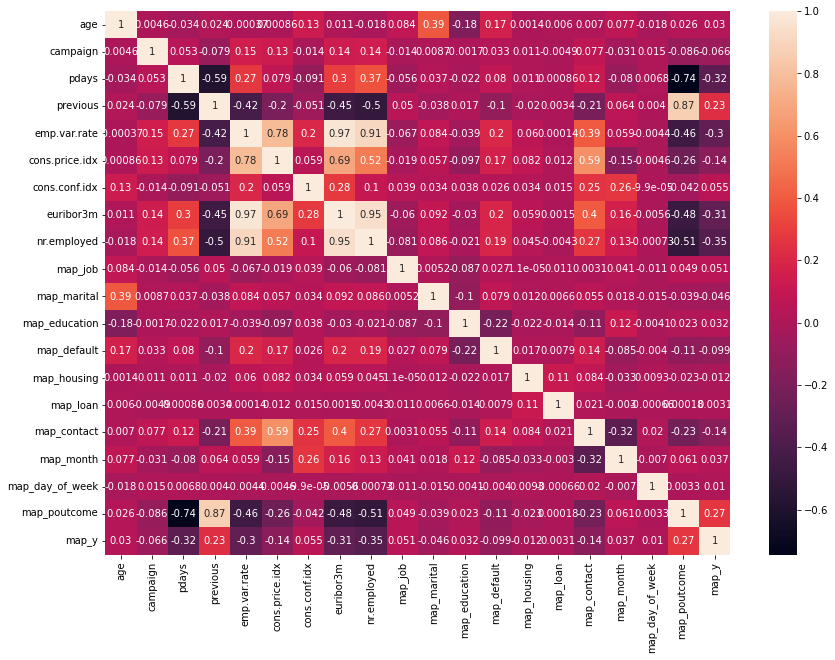

In [60]:
plt.figure(figsize=(14, 10))
sns.heatmap(df_num.corr(), annot=True)

In [61]:
df_num.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,map_job,map_marital,map_education,map_default,map_housing,map_loan,map_contact,map_month,map_day_of_week,map_poutcome,map_y
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,7,1,1,0,1,1,1,4,0,0,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,3,1,4,1,1,1,1,4,0,0,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,3,1,4,0,0,1,1,4,0,0,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,2,0,1,1,1,4,0,0,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,3,1,4,0,1,0,1,4,0,0,0


## Transformação dos Dados

In [81]:
class MyHotEncoder:
    def __init__(self, df, cols):
        self.df = df
        self.list_oneHotEncoder = []
        self.list_col = []

        if isinstance(cols, list):
            self.list_col = cols
        else:
            self.list_col.append(cols)

    #Treina os dados passados.
    def fit_transform(self):

        self.df.reset_index(drop=True, inplace=True) #Reseta o index do dataset para não causar problemas
        X = self.df.values

        #Para cada coluna crie uma string contendo o nome do atributo e o nome da categoria.
        #Exemplo de saída: [sex_male]
        for col in self.list_col: 
            valores = list(self.df[col].sort_values().unique())
            colunas = []
            for i in valores:
                colunas.append(col + '_' + str(i))
            colunas = colunas + list(self.df.columns)
            
            #One hot encoder para treinar
            onehotencoder = OneHotEncoder(handle_unknown='ignore')
            self.list_oneHotEncoder.append(onehotencoder)

            enc_df = onehotencoder.fit_transform(self.df[[col]]).toarray()
            enc_df = pd.DataFrame(enc_df)
            
            #União do dataset gerado ao dataset original
            self.df = enc_df.join(self.df)
            self.df.columns = colunas
            self.df.drop(col, axis=1, inplace=True)
        
        return self.df

    #Apenas aplica a transformação a novos dados.
    def transform(self, df):
        
        for i in range(len(self.list_col)):
            col = self.list_col[i]

            valores = list(df[col].sort_values().unique())
            colunas = []
            for j in valores:
                colunas.append(col + '_' + str(j))
            colunas = colunas + list(df.columns)

            #One hot encoder para transformar
            enc_df = self.list_oneHotEncoder[i].transform(df[[col]]).toarray()
            enc_df = pd.DataFrame(enc_df)

            #União do dataset gerado ao dataset original
            df = enc_df.join(df)
            df.columns = colunas
            df.drop(col, axis=1, inplace=True)


        return df  

In [83]:
ohe = MyHotEncoder(df_num, ['map_job', 'map_marital', 'map_default', 'map_loan', 'map_poutcome', 'emp.var.rate'])

df_ohe = ohe.fit_transform()

In [85]:
df_num = df_ohe

## Balanceamento das Classes

In [101]:
df_num_0 = df_num[df_num['map_y'] == 0]
df_num_1 = df_num[df_num['map_y'] == 1]

In [102]:
len(df_num_0), len(df_num_1)

(36548, 4640)

In [103]:
# Upsample da classe minoritária
from sklearn.utils import resample
df_num_1_sample = resample(df_num_1, replace = True, n_samples = 36548, random_state = 150) 

In [105]:
df_balanced = pd.concat([df_num_0, df_num_1_sample])

In [106]:
df_num = df_balanced

## Feature Selection

In [107]:
x_encoded = df_num.drop(columns=['map_y']).values
y = df_num['map_y']

In [108]:
randomForest = RandomForestClassifier()
randomForest.fit(x_encoded, y)

RandomForestClassifier()

In [109]:
preds = randomForest.predict(x_encoded)
f_score = f1_score(preds, y)

In [110]:
print('F1 score em Teste = {:.2f}%'.format(f_score * 100))

F1 score em Teste = 99.60%


In [111]:
df_temp = pd.DataFrame(randomForest.feature_importances_, index=df_num.columns.drop('map_y'), columns=['importance']).sort_values(by='importance', ascending=False)
df_temp

,importance
age,0.162588
euribor3m,0.151040
campaign,0.089355
nr.employed,0.071082
map_education,0.069528
map_day_of_week,0.060467
map_housing,0.034464
cons.conf.idx,0.030845
cons.price.idx,0.026469
pdays,0.020981


In [112]:
colunas_importantes = list(df_temp.loc[df_temp['importance'] > 0.02].index)

<AxesSubplot:xlabel='importance'>

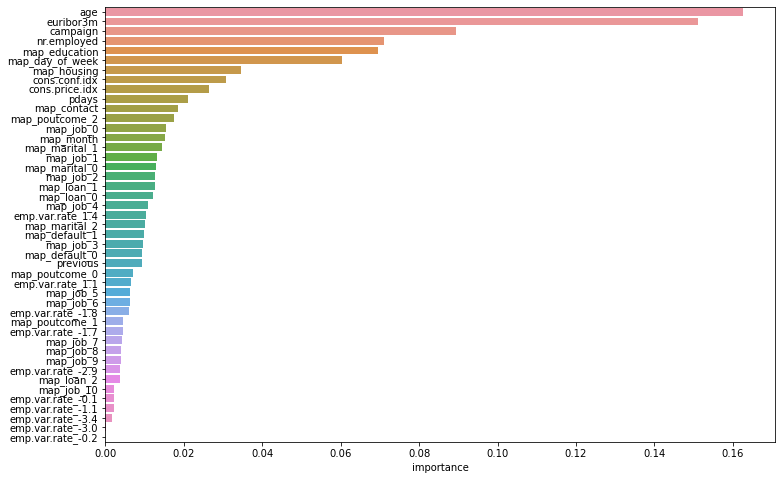

In [113]:
plt.figure(figsize=(12,8))
sns.barplot(x=df_temp['importance'], y=df_temp.index)

## Modelagem

In [114]:
list_estimators = [
    {'name': 'Logistic Regression',
     'model': LogisticRegression(),
     'params': {
                'fit_intercept': [True, False],
                'solver': ['newton-cg', 'lbfgs', 'liblinear']}
    },
    

    {'name': 'SVM - Support Vector Machine',
     'model': SVC(),
     'params': {}
    },

    {'name': 'Random Forest',
     'model': RandomForestClassifier(),
     'params': {
            'n_estimators': [100],
            'bootstrap': [True, False], 
            'criterion': ['entropy'], 
            'min_samples_leaf': [1, 5, 10], 
            'min_samples_split': [10, 20, 30]
     }
    },

    {
       'name': 'XGB - Extreme Boosting Classifier',
       'model': XGBClassifier(),
       'params': {
          'eta': [0.3],
          'max_depth': [3],
          'gamma': [0, 1],
          'scale_pos_weight': [0, 2]
          #'alpha': [0.5, 1, 1.5],
          #'lambda': [0.5, 1, 1.5]
       }
    }
    
    ]

In [115]:
list_estimators = [

    {'name': 'Random Forest',
     'model': RandomForestClassifier(),
     'params': {
            
     }
    },

    ]

In [116]:
x_axes = ['Não', 'Sim']
y_axes =  ['Sim', 'Não']

def conf_matrix(z, x=x_axes, y=y_axes):
    
    z = np.flip(z, 0)

    # change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in z]

    # set up figure 
    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='ice')

    # add title
    fig.update_layout(
        title_text='<span><b>Confusion matrix</b></span>',
        xaxis = dict(title='Valores previstos'),
        yaxis = dict(title='Valores reais'),
        width=300,
        height=300
        )

    # add colorbar
    fig['data'][0]['showscale'] = True
    fig.show()
    #return fig

In [117]:
def autoModel(X_train, Y_train, X_test, Y_test):

    #Inicializando variáveis
    list_all_results = []
    list_standardization = [StandardScaler(), RobustScaler()]

    best_acc = 0
    best_model = {
        'name': 'null',
        'model_grid': 'null',
        'best_params': 'null',
        'stand': 'null',
        'acc_train': 0,
        'acc_test': 0
    }

    #Para cada tipo de padronização iteramos
    for stand in list_standardization:

        #Para cada algoritmo na lista de algoritmos
        for estimator in list_estimators:
            
            #Criação do objeto GridSearch
            model_grid = GridSearchCV(estimator=estimator['model'], param_grid=estimator['params'], cv=10)
            
            #Criação do pipeline de execução
            pipe = Pipeline(steps=[('scale', stand), ('grid', model_grid)])
            pipe.fit(X_train, Y_train)

            #Realizando as previsões para cada dataset. Treino e teste
            preds_train = pipe.predict(X_train)
            preds_test = pipe.predict(X_test)
            
            #Otendo os resultados para cada métrica
            acc_train = accuracy_score(preds_train, Y_train)
            acc_test = accuracy_score(preds_test, Y_test)
            f1_train = f1_score(preds_train, Y_train)
            f1_test = f1_score(preds_test, Y_test)

            #Exibindo os resultados por acurácia, f1 score e matriz de confusão de treino e teste para cada algoritmo.
            print('Algoritmo: [{}]'.format(estimator['name'])) 
            print('stand:[{}] [ACCURACY] train:[{}%]  test:[{}%]'.format(stand, round(acc_train * 100, 2), round(acc_test * 100, 2)))
            print('stand:[{}] [F1 SCORE] train:[{}%]  test:[{}%]'.format(stand, round(f1_train * 100, 2), round(f1_test * 100, 2)))
            conf_matrix(confusion_matrix(preds_test, Y_test))

            #Armazenando sempre o melhor resultado
            if acc_test > best_model['acc_test']:
                best_model['name'] = estimator['name'],
                best_model['model_grid'] = pipe['grid'].estimator,
                best_model['best_params'] =  pipe[1].best_params_,
                best_model['stand'] = stand
                best_model['acc_train'] = acc_train
                best_model['acc_test'] = acc_test

            #Armazenando todos os resultados em uma lista para exibir em um dataframe final
            list_all_results.append(
                {'name': estimator['name'],
                'standardization': re.sub(r'[()]', '', str(stand)),
                'f1 score': round(f1_test * 100, 2)
                })

    return best_model, list_all_results

In [118]:
#Selecionando somente as colunas que foram definidas anteriormente
x_transformed = df_num[colunas_importantes].values

In [119]:
#Divisão em treino e testes
X_train, X_test, Y_train, Y_test = train_test_split(x_transformed, y, test_size = 0.3, random_state = 0)

In [120]:
#Treinando, testando e avaliando os algoritmos
best_model, list_all_results = autoModel(X_train, Y_train, X_test, Y_test)

Algoritmo: [Random Forest]
stand:[StandardScaler()] [ACCURACY] train:[98.05%]  test:[94.05%]
stand:[StandardScaler()] [F1 SCORE] train:[98.07%]  test:[94.4%]


Algoritmo: [Random Forest]
stand:[RobustScaler()] [ACCURACY] train:[98.05%]  test:[94.02%]
stand:[RobustScaler()] [F1 SCORE] train:[98.07%]  test:[94.37%]
